## 1. 라이브러리 + 데이터 불러오기

In [1]:
!pwd

/content


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing, model_selection

In [3]:
drug_data = pd.read_csv("/content/drive/MyDrive/data_2022/data/drug200.csv")
display(drug_data.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## 2. 데이터 탐색

In [4]:
print(drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


In [18]:
print(drug_data.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


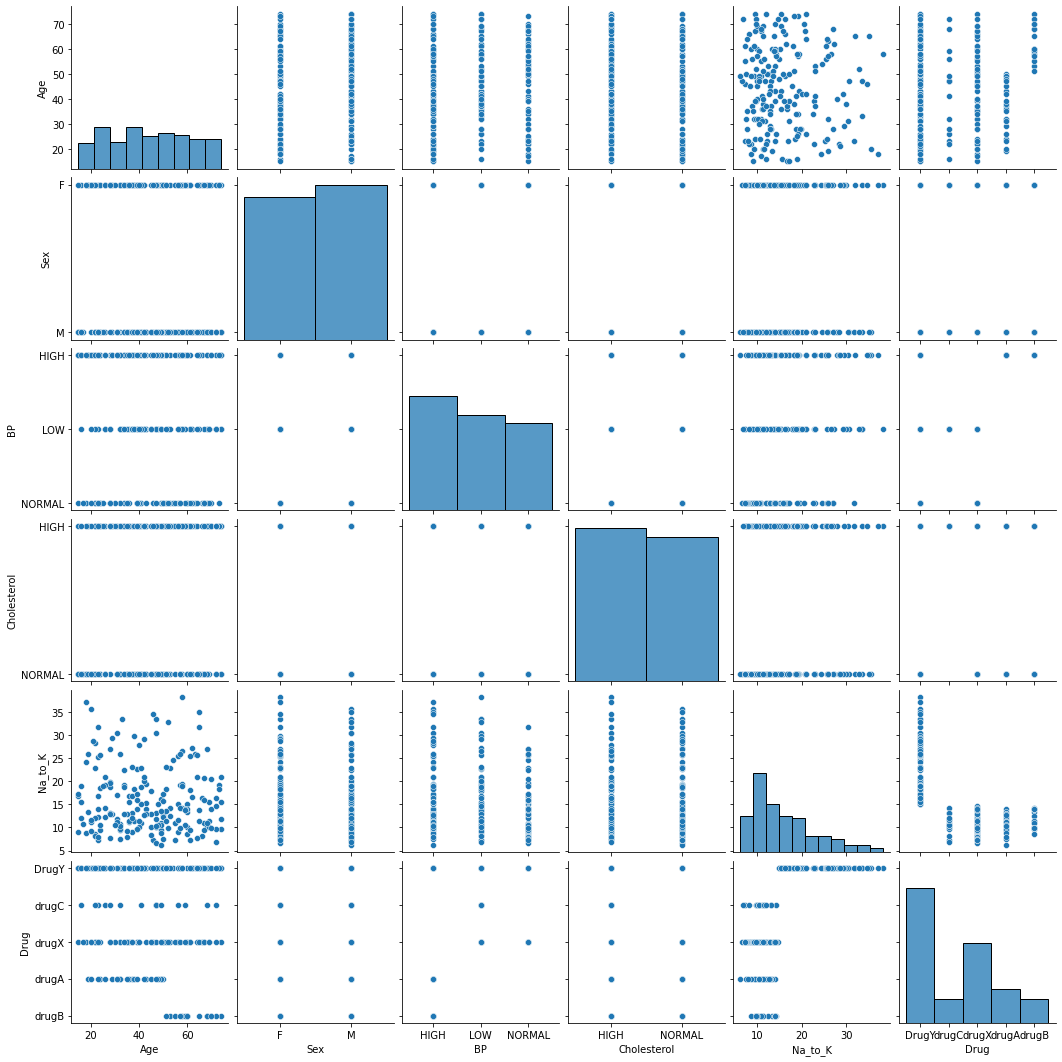

In [8]:
sns.pairplot(data=drug_data, vars=drug_data.columns)

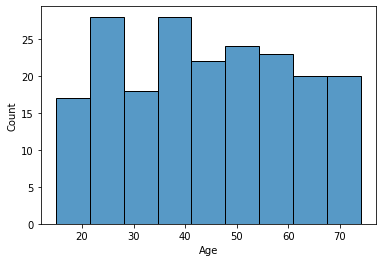

In [16]:
sns.histplot(drug_data.Age)
plt.show()

## 3. 데이터 전처리

In [10]:
# null 값 확인 및 처리

pd.isnull(drug_data).sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [30]:
# 나이 범주화

bins = [x * 10 - 1 for x in range(10)]
labels = [str(x) + "0대" for x in range(9)]
# print(bins)
# print(labels)
Age_group = pd.cut(drug_data.Age, bins, right=True, labels=labels)
# print(drug_data.Age[10:20])
# print(Age_group[10:20])
drug_data["Age_group"] = Age_group

In [31]:
print(drug_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Age          200 non-null    int64   
 1   Sex          200 non-null    object  
 2   BP           200 non-null    object  
 3   Cholesterol  200 non-null    object  
 4   Na_to_K      200 non-null    float64 
 5   Drug         200 non-null    object  
 6   Age_group    200 non-null    category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 10.1+ KB
None


In [41]:
# 원핫 인코딩

for_onehotencoding = ["Age_group", "Sex", "BP", "Cholesterol"]

enc = preprocessing.OneHotEncoder(drop='if_binary').fit(drug_data[for_onehotencoding])
print(enc.get_feature_names_out(for_onehotencoding)) # Sex, Cholesterol dropped (binary)

new_drug_data = enc.transform(drug_data[for_onehotencoding]).toarray()
print(type(new_drug_data))
print(new_drug_data.shape)

['Age_group_10대' 'Age_group_20대' 'Age_group_30대' 'Age_group_40대'
 'Age_group_50대' 'Age_group_60대' 'Age_group_70대' 'Sex_M' 'BP_HIGH'
 'BP_LOW' 'BP_NORMAL' 'Cholesterol_NORMAL']
<class 'numpy.ndarray'>
(200, 12)


In [46]:
# Label encoder : Drug

for_label = ["Drug"]
enc_le = preprocessing.LabelEncoder().fit(drug_data[for_label])
print(list(enc_le.classes_))
new_drug_data_target = enc_le.transform(drug_data[for_label])
print(type(new_drug_data_target))
print(new_drug_data_target.shape)
print(new_drug_data_target[:10])

['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']
<class 'numpy.ndarray'>
(200,)
[0 3 3 4 0 4 0 3 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# 스케일링
for_scaler = ["Na_to_K"]
scaler = preprocessing.MinMaxScaler().fit(drug_data[for_scaler])
print(scaler.data_min_)
print(scaler.data_max_) 
new_drug_data_ntk = scaler.transform(drug_data[for_scaler])
print(type(new_drug_data_ntk))
print(new_drug_data_ntk.shape)
print(new_drug_data_ntk[:10])

[6.269]
[38.247]
<class 'numpy.ndarray'>
(200, 1)
[[0.59684783]
 [0.21339671]
 [0.12023891]
 [0.04781412]
 [0.36819063]
 [0.07311277]
 [0.31290262]
 [0.14910251]
 [0.27837889]
 [0.40962537]]


In [54]:
# 병합
drug_data_x = np.concatenate((new_drug_data, new_drug_data_ntk), axis=1)
print(drug_data_x.shape)
print(drug_data_x[0, :])

drug_data_y = np.reshape(new_drug_data_target, (200,1))
print(drug_data_y.shape)
drug_data_combined = np.concatenate((drug_data_x, drug_data_y), axis=1)
print(drug_data_combined.shape)

(200, 13)
[0.         1.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.59684783]
(200, 1)
(200, 14)


* **drug_data_x** (13) -> 'Age_group_10대' 'Age_group_20대' 'Age_group_30대' 'Age_group_40대'
 'Age_group_50대' 'Age_group_60대' 'Age_group_70대' 'Sex_M' 'BP_HIGH'
 'BP_LOW' 'BP_NORMAL' 'Cholesterol_NORMAL', (scaled)'Na_to_K'
 
 
 * **drug_data_y** -> drug

## 4. 데이터 분할

In [59]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(drug_data_x, drug_data_y, test_size=0.2, random_state=0)

## 5. 학습 및 학습 결과 저장

In [68]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0481 - accuracy: 0.5625
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0374 - accuracy: 0.5750
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0272 - accuracy: 0.5813
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 1.0169 - accuracy: 0.5938
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 1.0059 - accuracy: 0.5938
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 0.9954 - accuracy: 0.5938
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.9854 - accuracy: 0.5938
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 0.9750 - accuracy: 0.6000
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.9639 - accuracy: 0.6000
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.9532 - accuracy: 0.6000
Epoch 11/200
5/5 [===========

In [73]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2/2 - 0s - loss: 0.2743 - accuracy: 0.9000 - 169ms/epoch - 84ms/step

Test accuracy: 0.8999999761581421


In [74]:
model.save("/content/drive/MyDrive/data_2022/drug_model_0422.h5")